# Comparison on Hours and Scores dataset

### Linear regression

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('study.csv')
df.head(2)

,Unnamed: 0,Hours,Scores
0,0,2.5,21
1,1,5.1,47


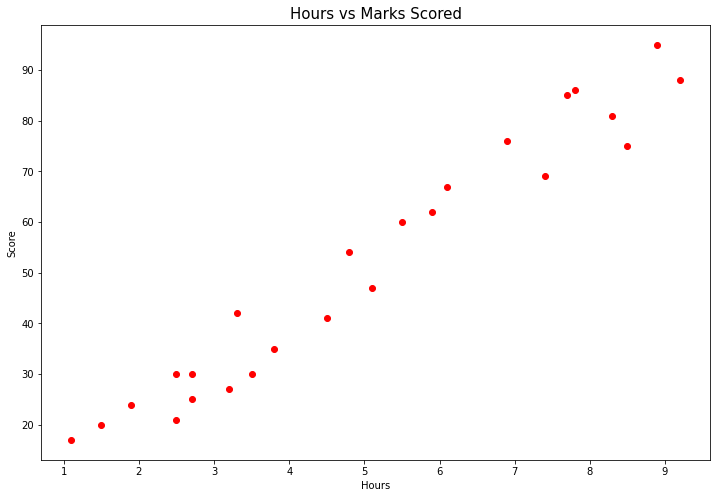

In [3]:
plt.figure(figsize = (12, 8))
plt.scatter(df['Hours'], df['Scores'], color = 'red')
plt.title('Hours vs Marks Scored', size = 15)
plt.xlabel('Hours')
plt.ylabel('Score')
plt.show()

In [4]:
X = df['Hours'].values
y = df['Scores'].values

In [5]:
n = len(X)
X = X.reshape(n, 1)

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=0)

In [8]:
from sklearn.linear_model import LinearRegression

In [9]:
lr = LinearRegression()

In [10]:
lr.fit(X_train, y_train)

LinearRegression()

In [11]:
model_pred = lr.predict(X_test)

In [12]:
from sklearn.metrics import mean_squared_error

In [13]:
np.sqrt(mean_squared_error(y_test, model_pred))

4.647447612100368

---

### Own algorithm

In [14]:
df.head(2)

,Unnamed: 0,Hours,Scores
0,0,2.5,21
1,1,5.1,47


In [15]:
X = df['Hours'].copy()
y = df['Scores'].copy()

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=0)

In [17]:
# Function for training
def fit(x, y, space_val = 5):
    try:
        # To get the column names
        x_col_name = X_train.name
        y_col_name = y_train.name
        # To create data frame on given training data with column names
        df = pd.DataFrame({x_col_name:x, y_col_name:y})
        # To get minimum and maximum value of training data
        x_min = float(x.min())
        x_max = float(x.max())
        # Calculate number of spaces based on number of data
        space = (len(x)//space_val) + 1
        # Variable to have list of evenly spaced numbers between X_min and X_max with space (Total number of spaces we want)
        x_spaces = list(np.linspace(x_min, x_max, space))
        # X_mean_vals list will contain average of X_train data which will lie between each space.
        x_mean_vals = []
        # y_mean_vals list will contain average of y_train data related to X_train for each space.
        y_mean_vals = []
        # Percentage_vals will contain average of percentage of X to y for data (X_train to y_train) which lied between each space.
        percentage_vals = []
        # Overall percentage will contain mean of percentage of X to y for all data (X_train to y_train) which will be used further
        # A1 B1 (overall_percentage)
        overall_percentage = []
        
        # For loop to get particular data frame each time where X_train lie between each space.
        # B2 (for loop)
        for i in range(1, len(x_spaces)):
            if i == 1:
                # B3 (.0000000001)
                dd = df[df[x_col_name] < x_spaces[i]+.0000000001]
                
            elif i == len(x_spaces) - 1:
                dd = df[df[x_col_name] > x_spaces[i - 1]]
                
            else:
                dd = df[(df[x_col_name] < x_spaces[i]+.0000000001) & (df[x_col_name] > x_spaces[i-1])]

            # List to get X_train values lie in taken dataframe(dd).
            x_1 = []
            # List to get y_train values lie in taken dataframe(dd).
            y_1 = []
            # List to get percentage difference for each X_train value to y_train value lie in taken dataframe(dd).
            percent_list = []
            
            # For loop to get X_train value, y_train value, percentage difference for each data (X_train to y_train) in taken dataframe(dd).
            for k in list(dd.index):
                x_value = dd.loc[k, x_col_name]
                y_value = dd.loc[k, y_col_name]
                x_1.append(x_value)
                y_1.append(y_value)
                # Calculate percentage difference for each data (X_train to y_train) in taken dataframe(dd).
                # B4 (perc calculation)
                perc = (y_value * 100)/x_value
                percent_list.append(perc)
                # A1 (overall_percentage)
                overall_percentage.append(perc)
            
            # If condition to append mean values of X_train, y_train, percentage difference from the taken dataframe(dd) only if the data present.
            if len(x_1) > 0:
                percentage_vals.append(np.mean(percent_list))
                x_mean_vals.append(np.mean(x_1))
                y_mean_vals.append(np.mean(y_1))
                
            # Else condition to append string value ‘nan’ if there is no data present in taken dataframe(dd).
            # It will replace further.
            # A5 B5 ('nan')
            else:
                percentage_vals.append('nan')
                x_mean_vals.append('nan')
                y_mean_vals.append('nan')

                
        # List to get indexes of starting ‘nan’ values for consecutive ‘nan’ or a single ‘nan’.
        start = []
        # List to get indexes of ending ‘nan’ +1 values for consecutive ‘nan’ or a single ‘nan’.
        end = []
        
        # For loop to get start index and end index +1 of ‘nan’.
        # It will be useful to replace null values (‘nan’) further.
        # --A5 (getting index using 'nan')
        # A6 (start, end)
        for i in range(len(x_mean_vals)):
            if x_mean_vals[i] == 'nan':
                
                if x_mean_vals[i - 1] == 'nan':
                    pass
                
                else:
                    start.append(i)
                    
            else:
                if x_mean_vals[i - 1] == 'nan':
                    end.append(i)
                    
                    
        # For loop to replace ‘nan’ with related value.
        # --A5 ('nan' replaced)
        # --A6 ('nan' replaced with the use of start and end)
        # B7 (for loop)
        if len(start) > 0:
            for i in range(len(start)):
                for j in range(start[i], end[i]):
                    x_mean_vals[j] = (x_mean_vals[start[i] - 1] + x_mean_vals[end[i]])/2
                    y_mean_vals[j] = (y_mean_vals[start[i] - 1] + y_mean_vals[end[i]])/2
                    percentage_vals[j] = (percentage_vals[start[i] - 1] + percentage_vals[end[i]])/2

        # Return 
        # To plot: x_mean_vals, y_mean_vals
        # To predict: percentage vals
        # X_spaces: used to find X_test data lie in which space
        # 1.average(Overall percentage): used to predict 
        # 2.if X_test data is less than minimum of X_train data (X_test < X_min (train)) or 
        # 3.X_test data is greater than maximum of X_train data (X_test > X_max (train)).  
        # 4.ie if the test data does not lie in spaces it uses overall percentage to predict output.
        # A8 B8 (return)
        return x_mean_vals, y_mean_vals, percentage_vals, x_spaces, np.mean(overall_percentage)
    
    except Exception:
        print('Kindly pass pandas core series which taken from the pandas dataframe')


In [18]:
# Pass data through defined function (fit) and get the output. 
X_mean_values, y_mean_values, percentage_values, x_spaces, total_mean_percentage = fit(X_train, y_train)

In [19]:
# Function for testing
def predict(x, x_spaces, percentage_vals, tot_mean_perc):
    # To store predicted values.
    predicted = []
    
    try:
        # --A8 (x_spaces used)
        for i in x:
            # --A1, --A8 (overall_percentage used)
            # B9 (if)
            if (i < x_spaces[0]) or (i == x_spaces[0]) or (i > x_spaces[-1]):
                predicted.append((tot_mean_perc * i)/100)
            
            # --A8 (percentage_vals used)
            # B10
            else:
                for j in range(len(x_spaces)-1):
                    if (i > x_spaces[j]) & (i < x_spaces[j+1]) or(i == x_spaces[j+1]):
                        predicted.append((i * percentage_vals[j])/100)
                        
        # return predicted output list
        return predicted
    
    except TypeError:
        print('Kindly pass pandas core series which taken from the pandas dataframe to fit')


In [20]:
# Pass data through defined function (predict) and get the output. 
predict_output = predict(X_test, x_spaces, percentage_values, total_mean_percentage)

In [21]:
# Print statement to print root mean squared error.
print(np.sqrt(mean_squared_error(y_test, predict_output)))

4.027581892639563


---